In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**PROBLEM STATEMENT :**
Customers are not able to choose the right insurance package according to their requirement.
**OBJECTIVE :**
Identifying the customers who need to pay more insurance charges.

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/DS_C12_S1_Regression_Insurance_Data_Project.csv")
df.head(2)

,age,gender,bmi,classif,children,smoker,region,charges
0,19,female,27.90,PREO,0,yes,southwest,16884.9240
1,18,male,33.77,OB1,1,no,southeast,1725.5523


In [3]:
def whole():
    col = df.columns
    shape = df.shape
    dtyp = df.dtypes
    null = df.isnull().sum()
    info = df.info()
    desc = df.describe()
    for i in df:
        uniq = print(df[i].unique())
        
    for i in df:
        val_cnt = print(df[i].value_counts())
    
    return (col,shape,dtyp,null,info,desc,uniq,val_cnt)

In [4]:
whole()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB
[ 19  18  28   0  32  31  46  37  60  25  62  23  56  27  52  30  34  59
  63  55  22  26  35  24  41  38  36  21  48  40  58  53  43  64  20  61
  44  57  29  45  54 -58  49  47  51  42  50  39  33 190  -1]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6  

(Index(['age', 'gender', 'bmi', 'classif', 'children', 'smoker', 'region',
        'charges'],
       dtype='object'),
 (1338, 8),
 age           int64
 gender       object
 bmi         float64
 classif      object
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object,
 age         0
 gender      0
 bmi         0
 classif     8
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 None,
                age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.133782    30.663397     1.094918  13270.422265
 std      14.958658     6.098187     1.205493  12110.011237
 min     -58.000000    15.960000     0.000000   1121.873900
 25%      26.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max     190.000000    53.130000     5.000000  63770.428010,
 N

In [5]:
df["classif"] = df["classif"].fillna(df["classif"].mode()[0])

In [6]:
df["age"]= abs(df["age"])

In [7]:
for i in [190,0,1]:
    df["age"].replace([i],df['age'].mode()[0], inplace=True)

In [8]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

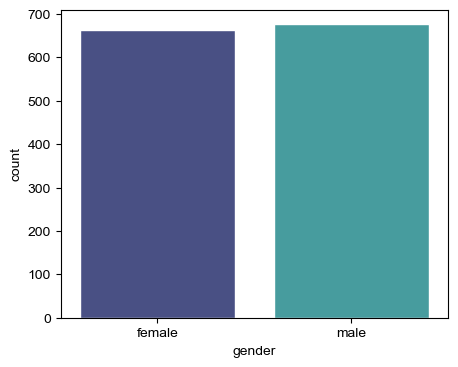

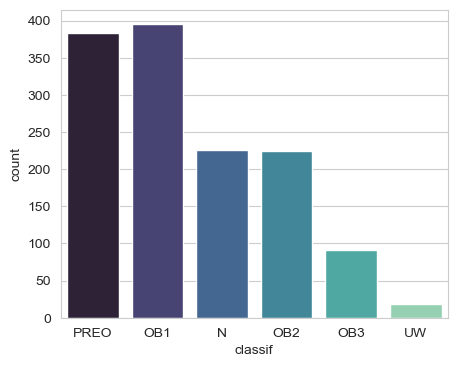

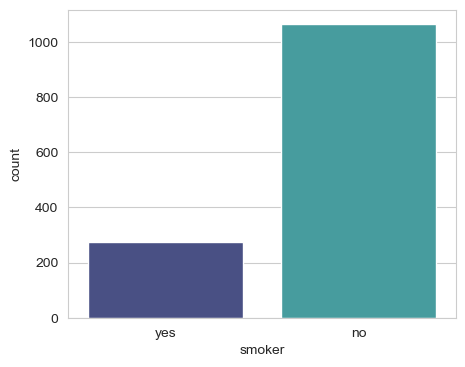

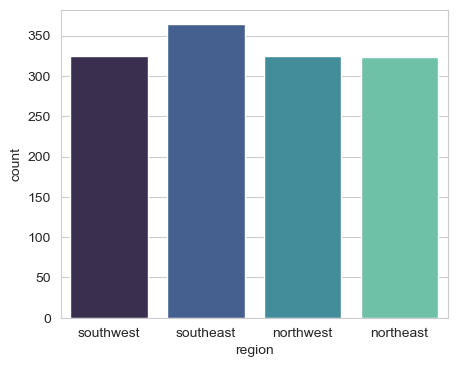

In [9]:
for i in cat:
    fig,ax = plt.subplots(figsize=(5,4))
    sns.set_style("whitegrid")
    sns.countplot(x = df[i], palette="mako")

**INTERPRETATION: Most of the customers are either from obesity class PREO or OB1 and most of them are non smokers.**

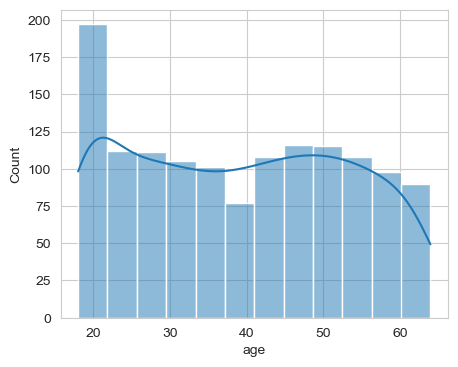

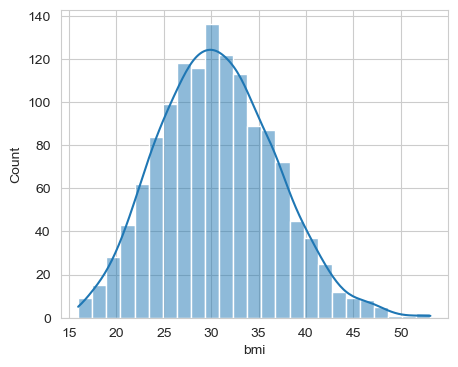

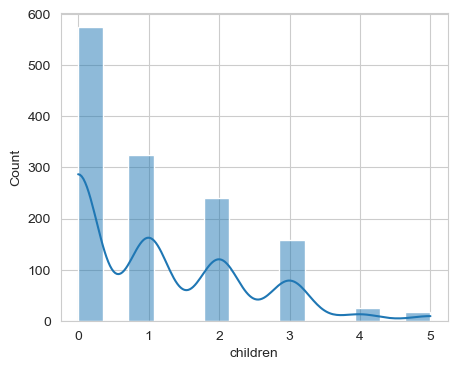

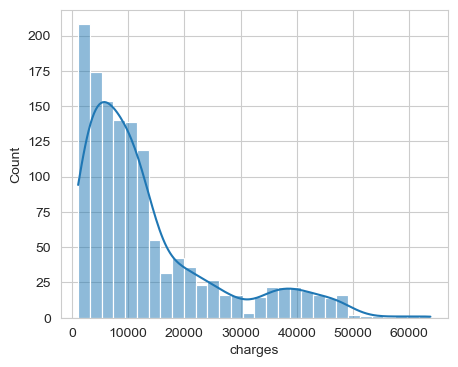

In [10]:
for i in num:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.set_style('whitegrid')
    sns.histplot(df[i], kde = 'True')

**Interpretation: bmi column is normally distributed whereas the charges column is left skewed. Most of the people do not have any kids.**

**IDENTIFYING PATTERN OF OUTLIERS USING BOXPLOT**

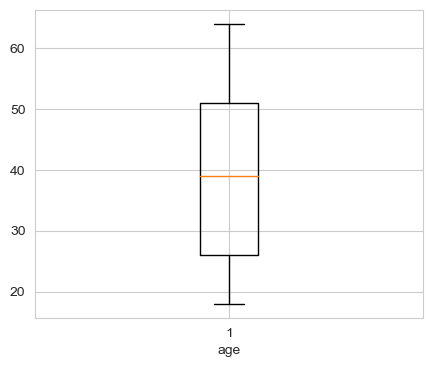

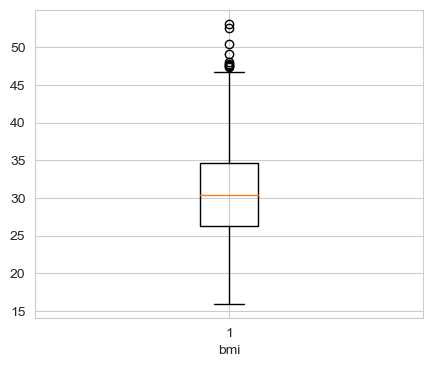

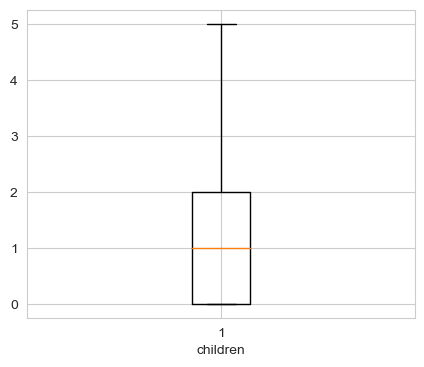

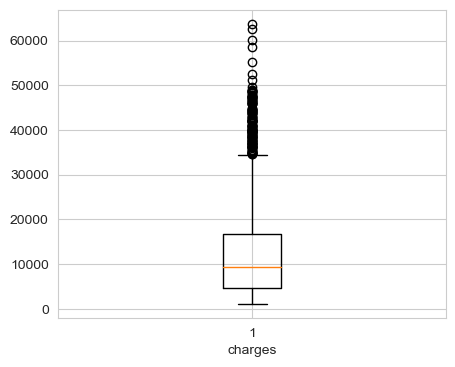

In [11]:
for i in num:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.set_style('whitegrid')
    plt.boxplot(df[i])
    plt.xlabel(i)

**INTERPRETATION: columns bmi and charges have outliers present in them. A pattern can be observed from here which is that higher the bmi, higher the chances of aquiring various dieseases and higher the amount of premium to be paid.**

# Bivariate

In [12]:
df.columns

Index(['age', 'gender', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

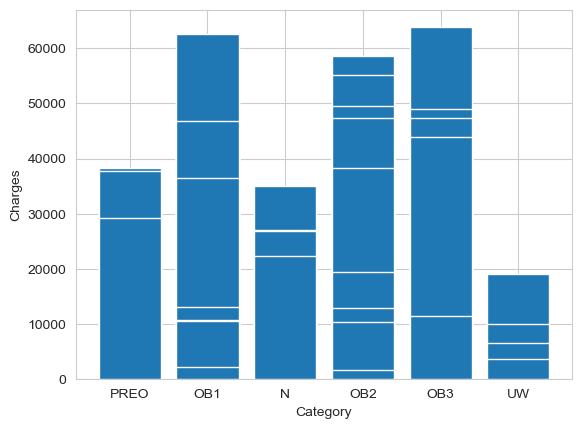

In [13]:
plt.bar(df["classif"],df["charges"])
plt.xlabel("Category")
plt.ylabel("Charges");

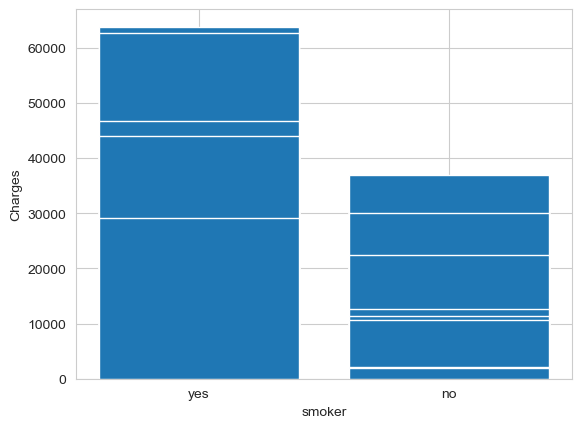

In [14]:
plt.bar(df["smoker"],df["charges"])
plt.xlabel("smoker")
plt.ylabel("Charges");

**INTERPRETATION: OB1, OB2 and OB3 categories, smokers have the highest charges to pay.**

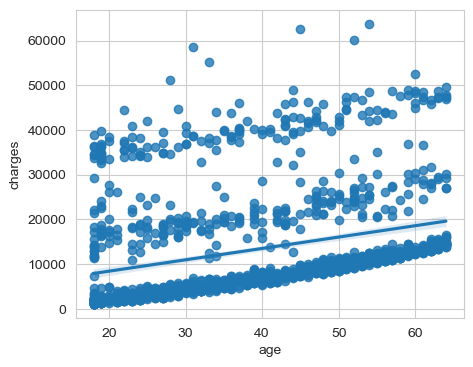

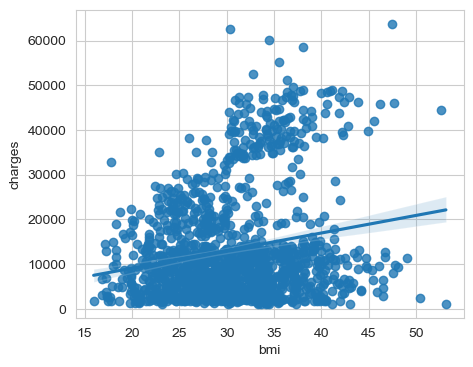

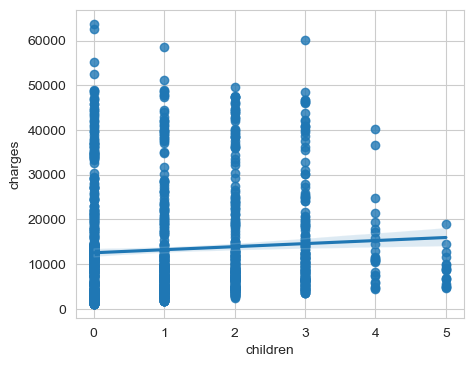

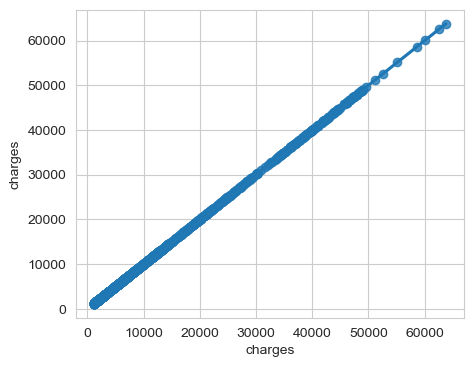

In [15]:
for i in num:
    fig,ax = plt.subplots(figsize = (5,4))
    sns.regplot(x=df[i], y=df["charges"]);

**INTERPRETATION: Charges and age are in a direct relation with each other; and charges and bmi are also in a direct relation with each other.**

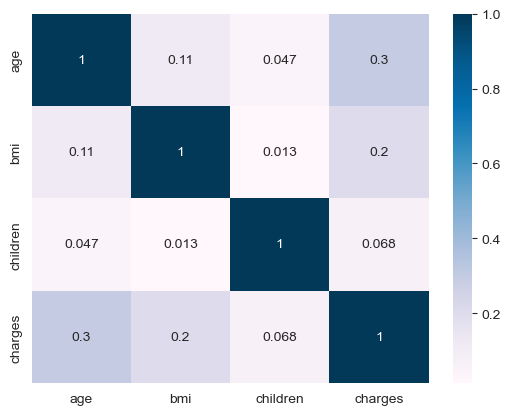

In [16]:
sns.heatmap(num.corr(), annot=True, cmap="PuBu");

**INTERPRETATION: columns age and charges have some kind of correlation. Also, columns bmi and charges have some kind of correlation.** 

# Feature Engineering

In [17]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [18]:
le = preprocessing.LabelEncoder()
sc = StandardScaler()

In [19]:
for i in cat:
    df[i] = df[i].astype('category')
    df[i] = le.fit_transform(df[i])

for i in num:
    df[i] = sc.fit_transform(df[i].to_numpy().reshape(-1,1))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df.head(1)

,age,gender,bmi,classif,children,smoker,region,charges
0,19,0,27.9,4,0,1,3,16884.924


In [22]:
y = df.loc[:,["charges"]]
x = df.iloc[:,:-1]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, random_state=42)

# Base Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [26]:
round(lin_reg.score(x_train,y_train)*100,2)

74.35

In [27]:
y_pred = lin_reg.predict(x_test)
y_pred

array([[ 8045.91676339],
       [ 7583.64759652],
       [36099.27162879],
       [ 8663.10134864],
       [27613.1740037 ],
       [10566.48978832],
       [  957.94879449],
       [17306.89645945],
       [ -348.44507988],
       [10479.8191325 ],
       [28714.1866592 ],
       [ 9972.1322937 ],
       [ 4377.84938486],
       [38256.66540459],
       [40211.74132067],
       [37351.00168567],
       [14997.25729828],
       [36033.29011826],
       [ 8239.31150355],
       [30657.83836811],
       [ 4369.94592633],
       [10508.647858  ],
       [ 2734.85375571],
       [ 7326.9779034 ],
       [10424.60336593],
       [13532.06899028],
       [14476.20982439],
       [ 6553.5776211 ],
       [ 9067.06955501],
       [ 2729.52662909],
       [ 7948.08589705],
       [13662.11419037],
       [ 5063.05598991],
       [ 4070.826035  ],
       [ 4796.78087749],
       [13399.80611831],
       [  833.53534782],
       [ 7769.32916843],
       [34118.80811049],
       [32791.49308049],


In [28]:
from sklearn.metrics import mean_squared_error
mse = round(mean_squared_error(y_test,y_pred)*100,2)
mse

3381507396.37

# Boosting - XGB

In [29]:
from xgboost import XGBRegressor

In [30]:
xgb_r = XGBRegressor(booster='gbtree')

In [31]:
xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [32]:
round(xgb_r.score(x_train,y_train)*100,2)

99.61

In [33]:
y_pred_xgb = xgb_r.predict(x_test)
y_pred_xgb

array([ 9756.808  ,  7886.68   , 27916.492  ,  8992.717  , 33958.05   ,
        6574.522  ,   996.5828 , 13035.879  ,  3689.202  , 10646.625  ,
       22150.463  ,  7424.3657 ,  4781.3726 , 46923.164  , 47697.133  ,
       41772.133  , 10339.09   , 39967.53   ,  8192.562  , 24025.117  ,
        3988.418  ,  8855.1    ,   452.81918,   347.69543, 11875.68   ,
       11390.19   , 16264.045  ,  6976.578  ,  9308.494  ,  6888.563  ,
        7175.541  , 13574.146  ,  4781.994  ,  5229.2085 ,  3168.6292 ,
        8388.952  ,  4354.5645 ,  7738.1533 , 24196.145  , 39104.195  ,
        5349.4053 ,  5053.689  , 12262.782  , 12188.0205 ,  6009.659  ,
       11225.62   , 11787.3    ,  7689.206  , 41647.957  ,  5188.033  ,
       13574.303  ,  4580.8013 ,  5603.3857 ,  5026.5215 , 11638.937  ,
       10724.188  ,  2077.4639 , 40730.21   , 12310.525  , 13926.876  ,
       14848.144  ,  6565.855  , 20334.154  , 11627.759  , 11330.479  ,
        5341.712  , 18291.695  , 11154.504  ,  3410.2297 ,  -226

In [34]:
mse_xgb = round(mean_squared_error(y_test,y_pred_xgb)*100,2)
mse_xgb

2539854089.25

# Bagging - Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
rfr = RandomForestRegressor(oob_score = True)
rfr.fit(x_train,y_train)

RandomForestRegressor(oob_score=True)

In [36]:
kf = KFold(n_splits = 3)
print(cross_val_score(rfr,x,y, cv=kf, scoring='r2').mean()) # training score

0.8336341905746262


In [37]:
print(rfr.oob_score_) # testing score

0.8199807574134412


In [38]:
x_test.head(2)

,age,gender,bmi,classif,children,smoker,region
764,45,0,25.175,4,2,0,0
887,36,0,30.020,1,0,0,1


In [39]:
y_pred_rfr = rfr.predict(x_test)
y_pred_rfr

array([13042.6282045,  5484.561806 , 28183.9519625, 13101.6613717,
       34387.4597205,  8405.5965125,  3091.984903 , 14252.467078 ,
        5957.2263649, 10615.0657722, 19913.3761661,  7291.9028606,
        4194.064946 , 45986.2061954, 48721.0444077, 44760.9528272,
       10191.5130712, 43469.8087191, 12071.1000023, 24232.9963076,
        6497.0752962,  8646.7887335,  1911.2831874,  3089.786901 ,
       12470.8561924, 11685.1974072, 13857.8447094,  6135.6501315,
       10448.920703 ,  4149.2753082,  7525.568608 , 11888.3242808,
        3455.9927439,  5969.187226 ,  3258.9908585, 10465.5282843,
        3975.0073556,  9651.7770946, 24166.6462152, 39857.5865808,
        8642.8241639,  4166.0480838, 13242.5529027, 13698.3483037,
        5839.835297 , 17067.3911302, 16534.5050496,  6168.6288124,
       42650.2417256,  6187.4720212, 14100.8490396,  3449.8294272,
        6841.324176 ,  4068.2355089, 11245.1260062, 10517.791519 ,
        3832.6579832, 43440.4027301, 12195.5496094, 14028.2831

# USER INPUT

In [40]:
details = []

for age in range(0,50):
    age = int(input("Enter age: "))
    if age<=100 and age>=10:
        details.append(age)
        break
    else:
        print("Invalid entry. Please enter correct age.")
        
    
for gender in range(0,50):
    gen = int(input("Enter gender [male(0) or female(1)]: "))
    if gen==0 or gen==1:
        details.append(gen)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for bmi in range(0,50):
    bmi = float(input("Enter bmi approx between 14-56: "))
    if bmi>=14 and bmi<=56:
        details.append(bmi)
        break
    else:
        print("Invalid input. Please enter within given range.")
        
for classif in range(0,50):
    classif = int(input("Enter class ['N'(0), 'OB1'(1), 'OB2'(2), 'OB3'(3), 'PREO'(4), 'UW'(5)]: "))
    if classif >=0 and classif<=5:
        details.append(classif)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for child in range(0,50):
    child = int(input("Enter no of children (0,1,2,3,4,5): "))
    if child>=0 and child<=5:
        details.append(child)
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for smoke in range(0,50):
    smoke = int(input("Is the person a smoker? [yes(1) or no(0)]: "))
    if smoke==0 or smoke==1:
        details.append(smoke)  
        break
    else:
        print("Invalid entry. Please enter from given options.")
        
for region in range(0,50):
    region = int(input("Enter your region [Northeast(0), Northwest(1), Southeast(2), Southwest(4)]: "))
    if region>=0 and region<=4:
        details.append(region) 
        break
    else:
        print("Invalid entry. Please enter from given options.")

        

details_tab = [details]
print("*"*100)
print("Your estimated premium charge is:", rfr.predict(details_tab))

Enter age: 23
Enter gender [male(0) or female(1)]: 1
Enter bmi approx between 14-56: 23
Enter class ['N'(0), 'OB1'(1), 'OB2'(2), 'OB3'(3), 'PREO'(4), 'UW'(5)]: 2
Enter no of children (0,1,2,3,4,5): 3
Is the person a smoker? [yes(1) or no(0)]: 1
Enter your region [Northeast(0), Northwest(1), Southeast(2), Southwest(4)]: 1
****************************************************************************************************
Your estimated premium charge is: [16444.3586923]
